### Student Information
Name:陳玠霖

Student ID:111065553

GitHub ID:TwPanTsu

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [270]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
import math
import seaborn as sns
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1.Data Preparation and Transformation

In [271]:
### Begin Assignment Here
#take out data from three txt
#amazon.com
websites = ["amazon.com", "imdb.com", "yelp.com"]
df1 = pd.read_csv("sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt", sep="	", header=None, 
                 names=["sentence", "score"])
df1.insert(2,column="websites",value= websites[0])
#imdb.com
df2 = pd.read_csv("sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt", sep="	", header=None, 
                 names=["sentence", "score"])
df2.insert(2,column="websites",value= websites[1])
#yelp.com
df3 = pd.read_csv("sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt", sep="	", header=None, 
                 names=["sentence", "score"])
df3.insert(2,column="websites",value= websites[2])
#merge together
frames = [df1, df2, df3]
df123 = pd.concat(frames, ignore_index=True)
#first ten records
df123.head(10)


,sentence,score,websites
0,So there is no way for me to plug it in here i...,0,amazon.com
1,"Good case, Excellent value.",1,amazon.com
2,Great for the jawbone.,1,amazon.com
3,Tied to charger for conversations lasting more...,0,amazon.com
4,The mic is great.,1,amazon.com
5,I have to jiggle the plug to get it to line up...,0,amazon.com
6,If you have several dozen or several hundred c...,0,amazon.com
7,If you are Razr owner...you must have this!,1,amazon.com
8,"Needless to say, I wasted my money.",0,amazon.com
9,What a waste of money and time!.,0,amazon.com


In [272]:
#make sure three txt merge together
df1.shape

(1000, 3)

In [273]:
df2.shape

(748, 3)

In [274]:
df3.shape

(1000, 3)

In [275]:
df123.shape

(2748, 3)

### 2.Check values

In [276]:
# check missing values
df123.isnull()

,sentence,score,websites
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2743,False,False,False
2744,False,False,False
2745,False,False,False
2746,False,False,False


In [277]:
#using func check_missing_values
df123.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,websites
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [278]:
#check duplicated values
df123.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [279]:
sum(df123.duplicated())

17

In [280]:
sum(df123.duplicated('sentence'))

17

In [281]:
#we have 17 duplicated records and we have to delete these
df123.drop_duplicates(keep=False, inplace=True)

In [282]:
#we can find our data is decreased to 2714 records
df123.shape

(2714, 3)

In [283]:
#another test for duplicate
sum(df123.duplicated())

0

### 3.Data Sampling and Preprocessing

In [284]:
#sampling
df123_sample = df123.sample(n=1000) #random state

In [285]:
len(df123_sample)

1000

In [286]:
df123_sample.head(5)

,sentence,score,websites
175,Superb Phone on a Great Network.,1,amazon.com
706,So anyone near you will hear part of your conv...,0,amazon.com
1425,It's as continuously beautiful to look at as a...,1,imdb.com
1586,This movie is so awesome!,1,imdb.com
1466,Even allowing for poor production values for t...,0,imdb.com


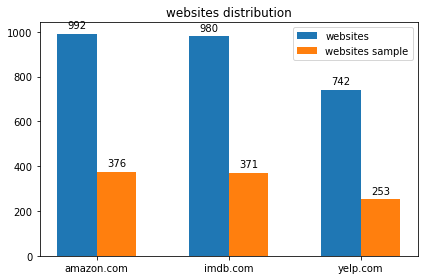

In [287]:
##compare the whole data and sampled data
x = np.arange(len(websites))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df123.websites.value_counts(), width, label='websites')
rects2 = ax.bar(x + width/2, df123_sample.websites.value_counts(), width, label='websites sample')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('websites distribution')
ax.set_xticks(x, websites)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [288]:
#feature creation
df123['unigrams'] = df123['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [289]:
#data.show
df123.head(5)

,sentence,score,websites,unigrams
0,So there is no way for me to plug it in here i...,0,amazon.com,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon.com,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon.com,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon.com,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon.com,"[The, mic, is, great, .]"


In [290]:
#unigrams closer look
list(df123[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [291]:
#Feature subset selection
count_vect = CountVectorizer()
df123_counts = count_vect.fit_transform(df123.sentence)
print(df123_counts[0]) #the number of feacture from first record

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [292]:
analyze = count_vect.build_analyzer()
analyze(df123.sentence[0])#words from fist record

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [293]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [294]:
df123_counts.shape

(2714, 5153)

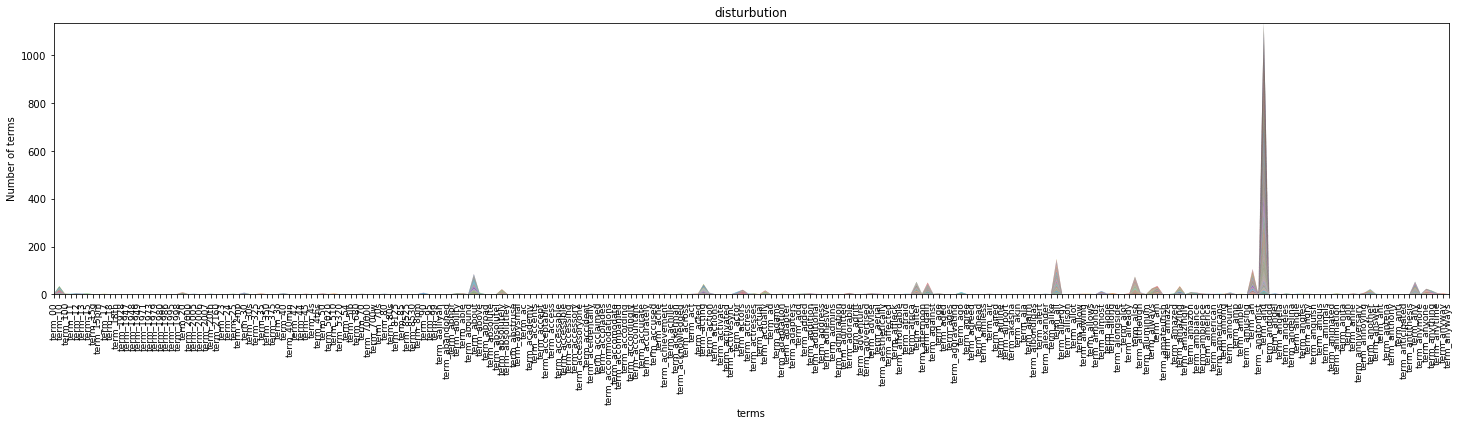

In [295]:
#visulization with the number of terms
plot_x2 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:250]]
plot_y2 = ["doc_"+ str(i) for i in list(df123.index)[0:]]
plot_z2 = df123_counts[0:, 0:250].toarray()


fig, ax = plt.subplots(figsize=(25, 5))
ax.stackplot(plot_x2, plot_z2, labels=plot_y2, alpha=1)
ax.set_title('disturbution')
ax.set_xlabel('terms')
ax.set_ylabel('Number of terms')
ax.margins(x=0,y=0)
ax.tick_params(axis='x', which='major', labelsize=9)
plt.xticks(rotation=90)
plt.show()
##I use Stackplots to visulize the gragh with 250 samples.
##although data have 5153 terms, this graph is still great.
##Nice and clean.It can contain all the document!

In [296]:
#Dimensionality Reduction
#reduced to 2
df123_reduced = PCA(n_components = 2).fit_transform(df123_counts.toarray())

In [297]:
df123_reduced.shape

(2714, 2)

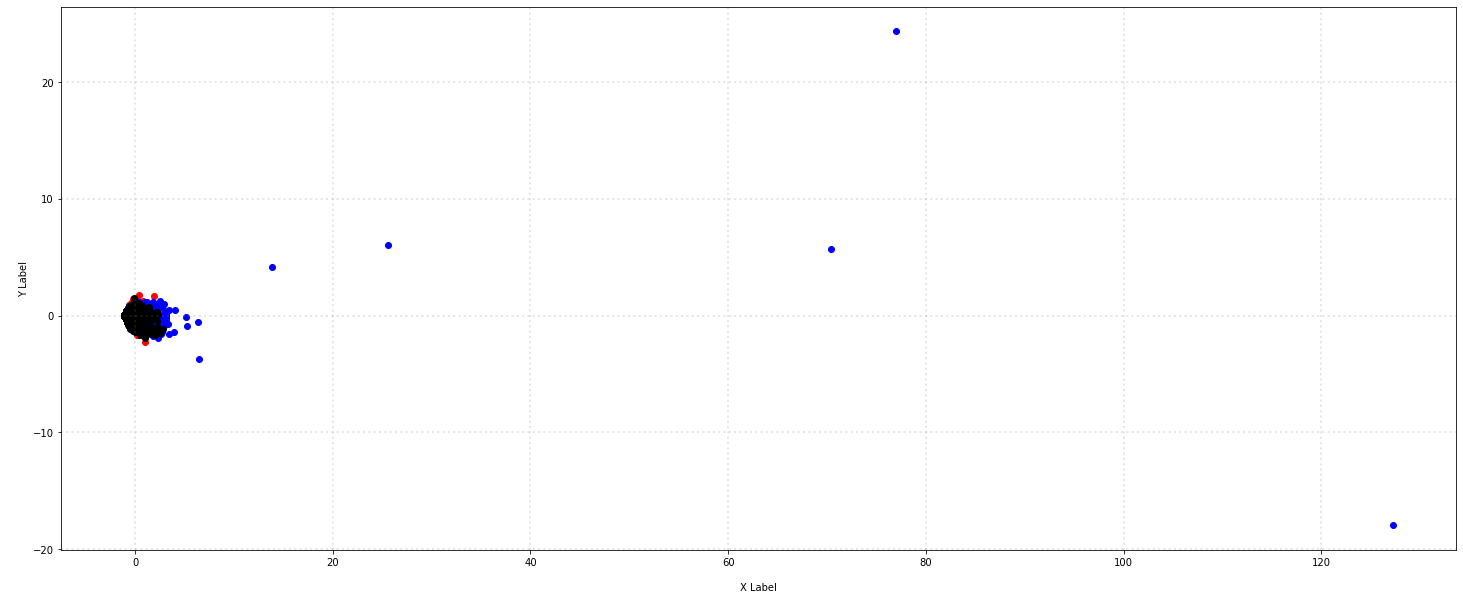

In [298]:
col = ['red', 'blue', 'black', 'green']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, websites in zip(col, websites):
    xs = df123_reduced[df123['websites'] == websites].T[0]
    ys = df123_reduced[df123['websites'] == websites].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

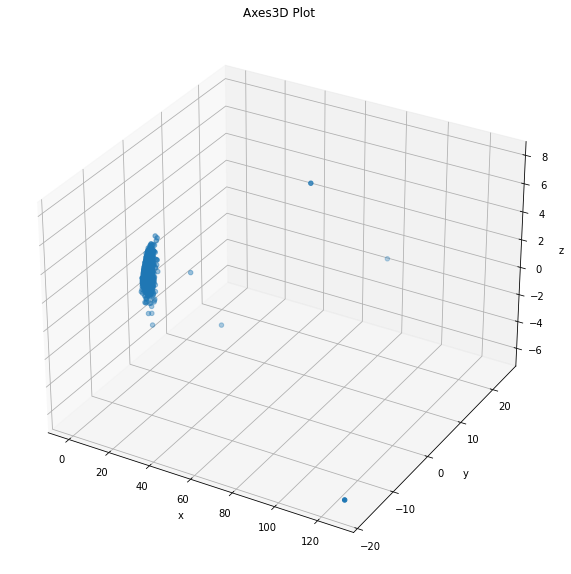

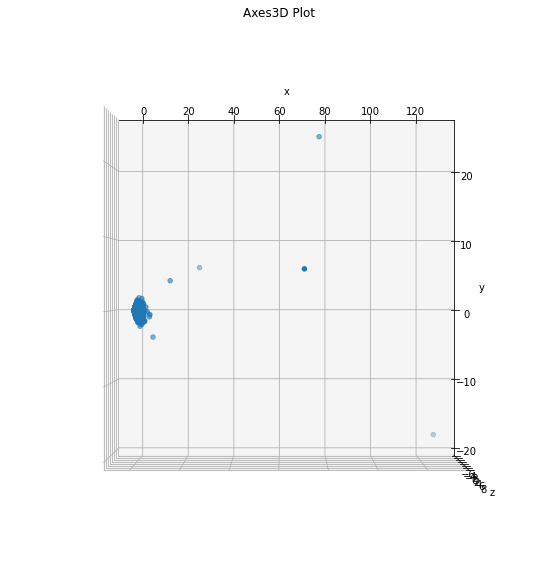

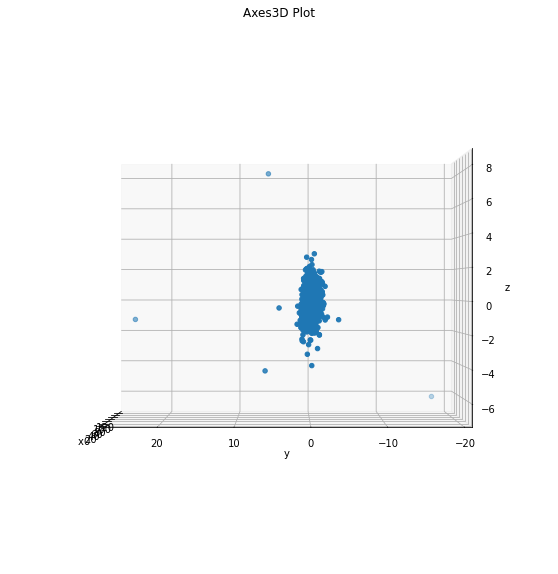

In [299]:
#reduced to 3
df123_reduced3 = PCA(n_components = 3).fit_transform(df123_counts.toarray())
df123_reduced3.shape

ax = plt.figure(figsize = (25,10)).add_subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter3D(df123_reduced3.T[0],df123_reduced3.T[1],df123_reduced3.T[2])
plt.title('Axes3D Plot')
plt.show()
ax2 = plt.figure(figsize = (25,10)).add_subplot(projection='3d')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.scatter3D(df123_reduced3.T[0],df123_reduced3.T[1],df123_reduced3.T[2])
ax2.view_init(elev=90, azim=-90)
plt.title('Axes3D Plot')
plt.show()
ax3 = plt.figure(figsize = (25,10)).add_subplot(projection='3d')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.scatter3D(df123_reduced3.T[0],df123_reduced3.T[1],df123_reduced3.T[2])
ax3.view_init(elev=0, azim=180)
plt.title('Axes3D Plot')
plt.show()
##the side view(XY) of 3d scatter plot is same with 2d scatter plot above!
##And 3d scatter plot has a lot of perspectives!

In [300]:
#Attribute Transformation / Aggregation
term_frequencies = []
for j in range(0,df123_counts.shape[1]):
    term_frequencies.append(sum(df123_counts[:,j].toarray()))
term_frequencies = np.asarray(df123_counts.sum(axis=0))[0]
term_frequencies[0]#sum of first term 00

1

In [301]:
term_frequencies.shape

(5153,)

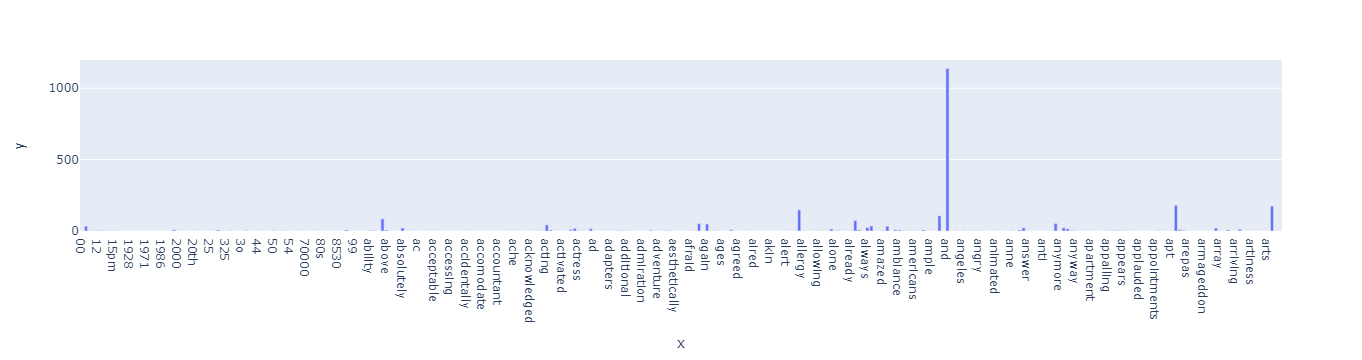

In [302]:
#term_frequencies.visualization
fig = px.bar(x = count_vect.get_feature_names_out()[0:300],y = term_frequencies[0:300])
fig.show()

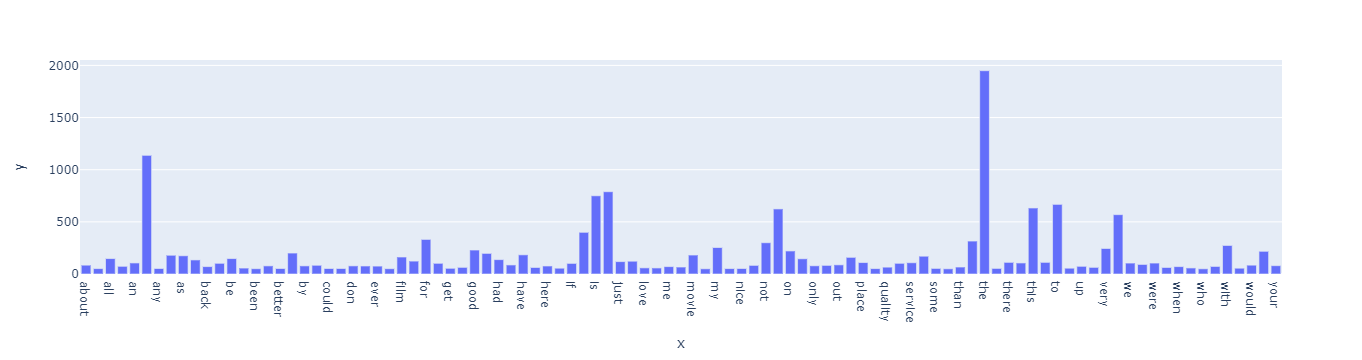

In [303]:
#term_frequencies.visualization2
Notzero = []
Notzero2 = []
for i in range(0,len(term_frequencies)):
    if term_frequencies[i] >= 50 :
        new = count_vect.get_feature_names_out()[i]
        new2 = term_frequencies[i]
        Notzero.append(new)
        Notzero2.append(new2)
fig = px.bar(x = Notzero , y = Notzero2)
fig.show()
#draw a new graph with only above 100 and take a better vision.
#clean and clear

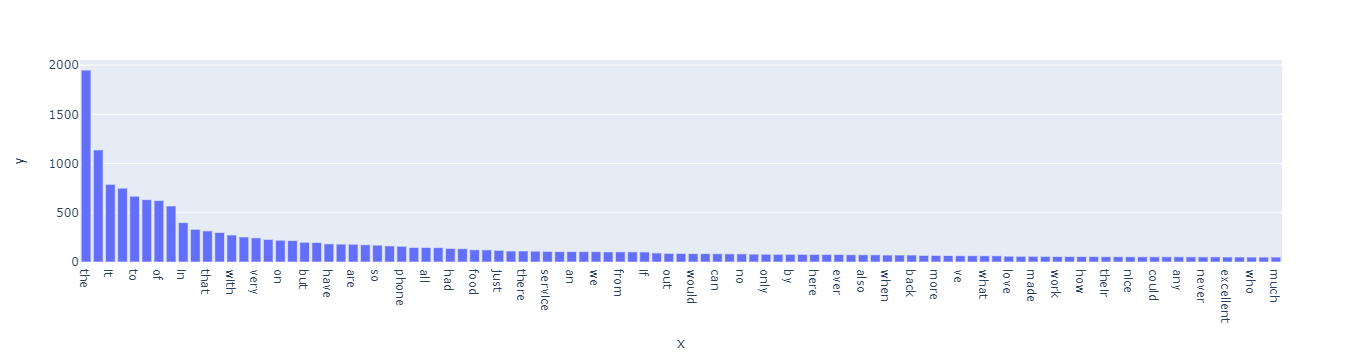

In [304]:
#term_frequencies.visualization3
#order in descending
fig = px.bar(x = Notzero , y = Notzero2)
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

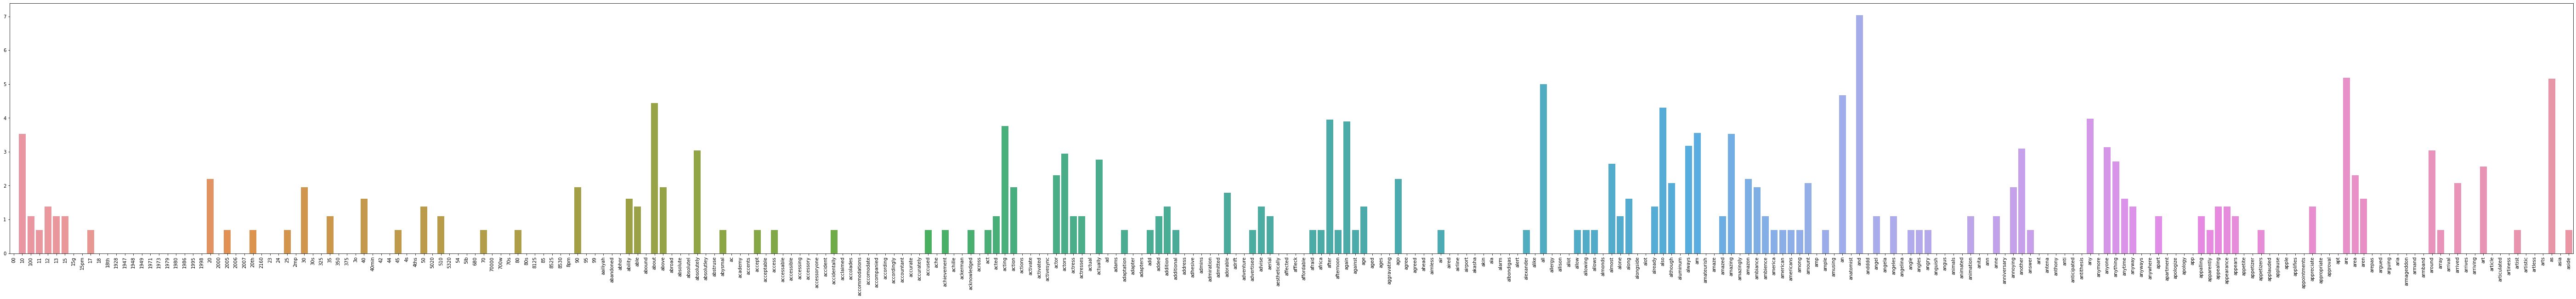

In [305]:
#The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format.
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [306]:
#Discretization and Binarization
mlb = preprocessing.LabelBinarizer()
mlb.fit(df123.websites)
df123['bin_websites'] = mlb.transform(df123['websites']).tolist()
df123.head(5)

,sentence,score,websites,unigrams,bin_websites
0,So there is no way for me to plug it in here i...,0,amazon.com,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon.com,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,amazon.com,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon.com,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,amazon.com,"[The, mic, is, great, .]","[1, 0, 0]"


### 3.Data Exploration

In [307]:
document_to_transform_1 = []
random_record_1 = df123.iloc[1000]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df123.iloc[2000]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df123.iloc[2700]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["This if the first movie I've given a 10 to in years.  "]
['I think not again']
['Shrimp- When I unwrapped it (I live only 1/2 a mile from Brushfire) it was literally ice cold.']


In [308]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 1 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [309]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})
#so funny that they dont have any relation!! 

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Fin